#**Zomato Data Analysis Project**

# **Importing Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#**Create the dataframe**

In [5]:
dataframe = pd.read_csv("/content/Zomato data .csv")


In [ ]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


# coverting the datatype of column - rate




In [6]:
def convert_rate(value):
  if isinstance(value,str):
    value = value.replace('/5','')
    return float(value)
  return value

In [7]:
def handleRate(value):
  value=str(value).split('/')
  value=value[0]
  return float(value)

In [8]:
dataframe['rate'] = dataframe['rate'].apply(handleRate)

In [11]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


#type of restaurant

Text(0.5, 0, 'type of restaurant')

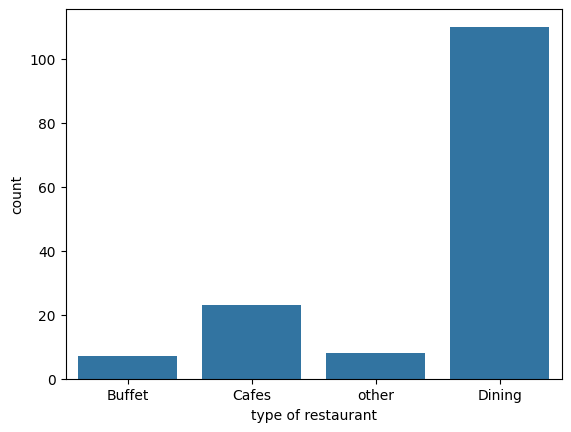

In [12]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("type of restaurant")

conclusion - majority of the restaurant falls in dinning category


Text(0, 0.5, 'votes')

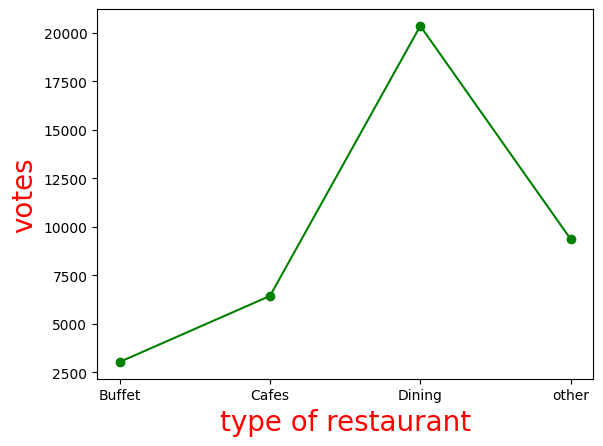

In [14]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':grouped_data})
plt.plot(result,c = "green", marker = "o")
plt.xlabel("type of restaurant" , c="red",size=20)
plt.ylabel("votes", c = "red",size=20)

conclusion - dinning restaurants has received maximum votes

<function matplotlib.pyplot.show(close=None, block=None)>

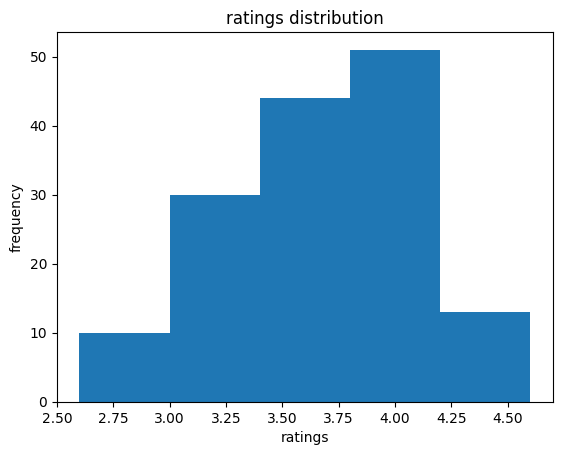

In [17]:
plt.hist(dataframe['rate'],bins = 5)
plt.xlabel("ratings")
plt.ylabel("frequency")
plt.title("ratings distribution")
plt.show

conclusion - majority of the restaurants received ratings from 3.5 to 4

In [18]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

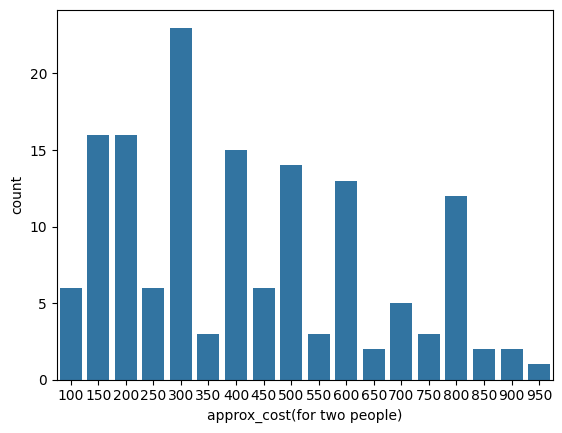

In [19]:
couple_data = dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)


conclusion - the majority of couples prefer restaurants with an approximate cost of 300 rupees


which mode receives maximum rating

<Axes: xlabel='online_order', ylabel='rate'>

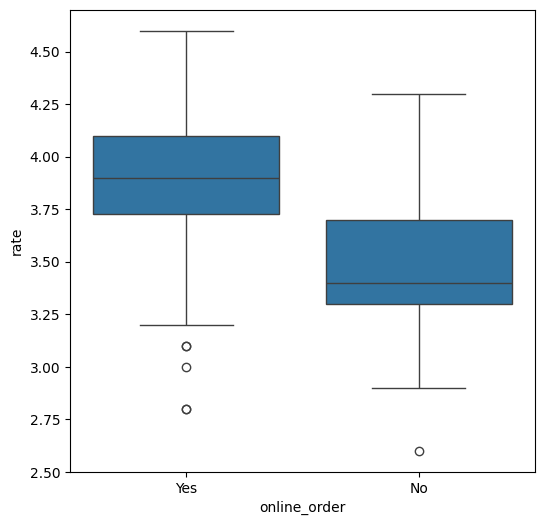

In [20]:
plt.figure(figsize = (6,6))
sns.boxplot(x = "online_order",y = "rate",data = dataframe)

conclusion - offline order received lower rating in comparison to online order

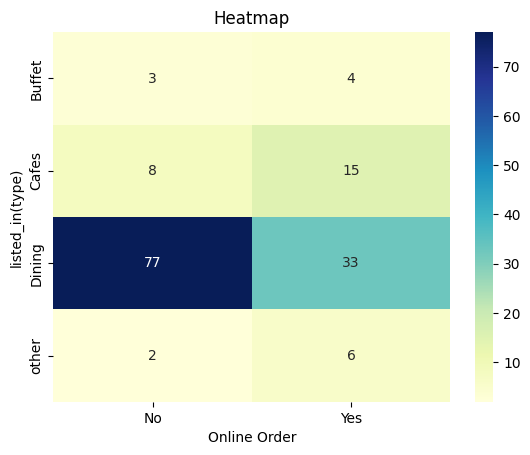

In [21]:
pivot_table = dataframe.pivot_table(index= 'listed_in(type)',columns = 'online_order',aggfunc='size' ,fill_value= 0)
sns.heatmap(pivot_table,annot=True,cmap="YlGnBu",fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('listed_in(type)')
plt.show()

conclusion - dinning restaurants primarily accept offline orders, whereas cafes primarily receive online orders.this suggests that clients prefers orders in person at restaurants, but preferes online ordering at cafes